In [2]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
url = "https://raw.githubusercontent.com/Chasindu/Cardiovascular-Diseases-Risk-Prediction/main/CVD_cleaned.csv"
df = pd.read_csv(url, sep=',')

# backup_dataset
df_backup = df

In [26]:
df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


In [5]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [6]:
df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [8]:
#Shows which categories exist for Heart Disease target output and how many rows belong to each category 
df["Heart_Disease"].value_counts()

Heart_Disease
No     283883
Yes     24971
Name: count, dtype: int64

In [9]:
#Shows which categories exist for Heart Disease target output and how many rows belong to each category 
df["Diabetes"].value_counts()

Diabetes
No                                            259141
Yes                                            40171
No, pre-diabetes or borderline diabetes         6896
Yes, but female told only during pregnancy      2646
Name: count, dtype: int64

In [18]:
#Shows which categories exist for Heart Disease target output and how many rows belong to each category 
df["Checkup"].value_counts()

Checkup
Within the past year       239371
Within the past 2 years     37213
Within the past 5 years     17442
5 or more years ago         13421
Never                        1407
Name: count, dtype: int64

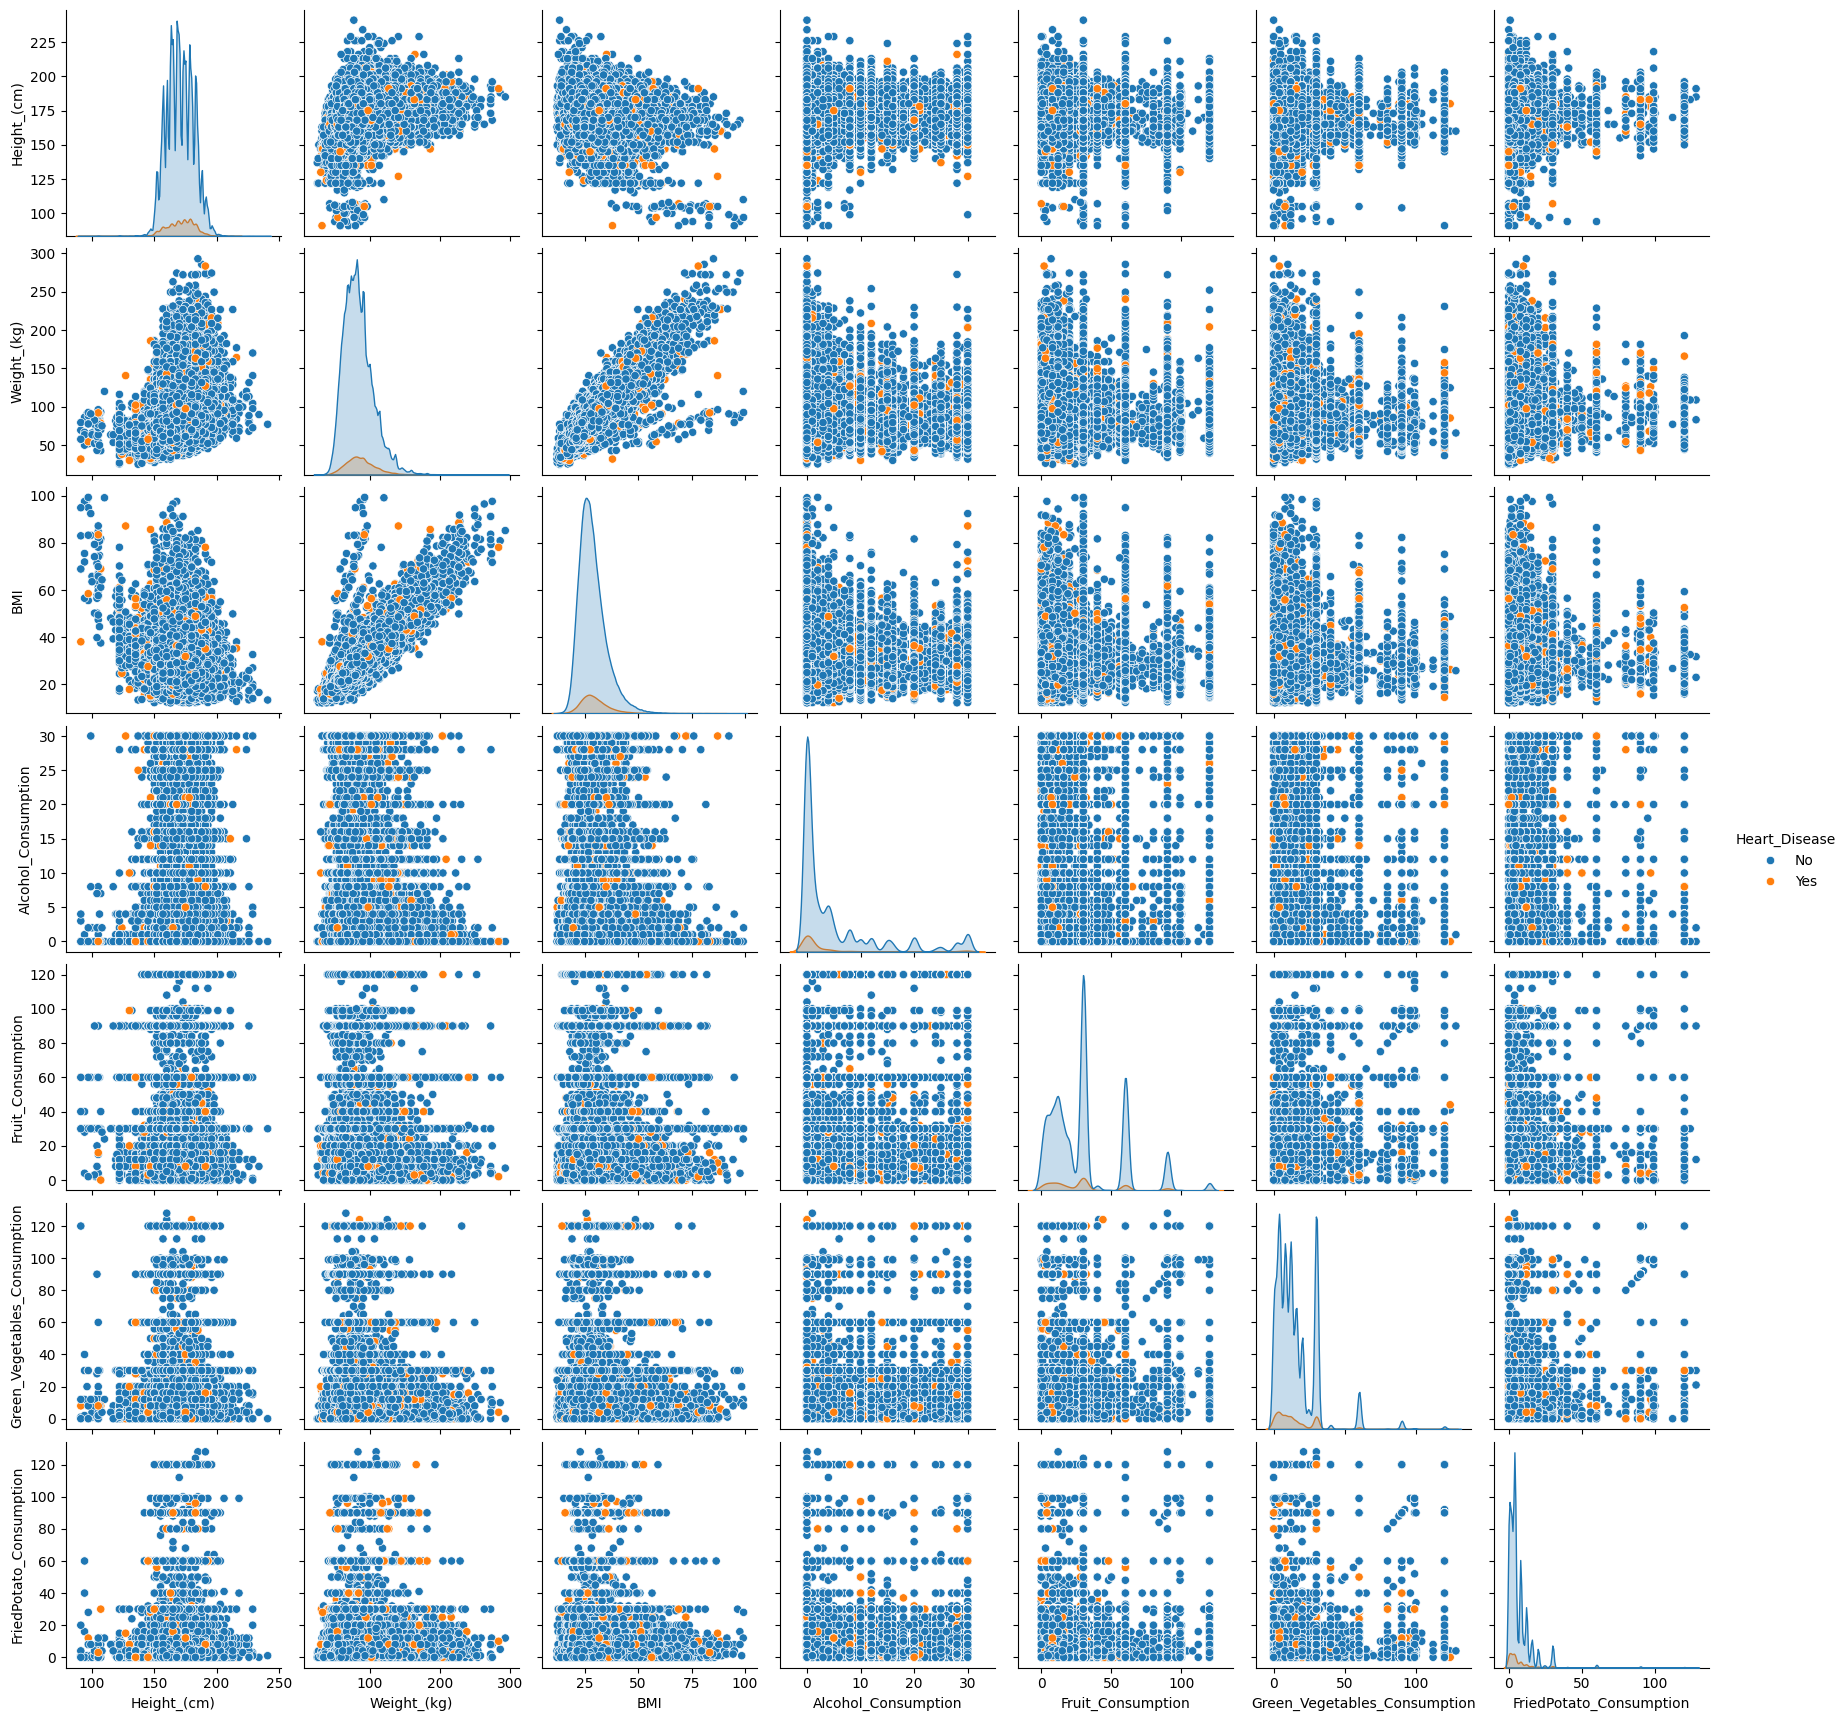

In [10]:
#use seaborn to pairplot, use the hue parameter to color the data points based on the species categorical variable. 

sns.pairplot(df, hue="Heart_Disease")

In [11]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
Height_(cm),1.000000,0.472186,-0.027408,0.128835,-0.045911,-0.030148,0.108795
Weight_(kg),0.472186,1.000000,0.859699,-0.032373,-0.090612,-0.075904,0.096351
BMI,-0.027408,0.859699,1.000000,-0.108684,-0.076611,-0.070640,0.048366
Alcohol_Consumption,0.128835,-0.032373,-0.108684,1.000000,-0.012562,0.060053,0.020543
Fruit_Consumption,-0.045911,-0.090612,-0.076611,-0.012562,1.000000,0.270430,-0.060311
Green_Vegetables_Consumption,-0.030148,-0.075904,-0.070640,0.060053,0.270430,1.000000,0.003180
FriedPotato_Consumption,0.108795,0.096351,0.048366,0.020543,-0.060311,0.003180,1.000000


### This is where we encode all of our categorical data!

In [27]:
#Integer encoding 2
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

columns_to_encode = ["Exercise", "Heart_Disease", 
                     "Skin_Cancer", "Other_Cancer", "Depression", 
                     "Arthritis", "Sex", "Age_Category", "Smoking_History"]

for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])
        # Display the mapping
    print(f"Column: {column}")
    for original_value, encoded_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
        print(f"   {original_value} -> {encoded_value}")

encoding_health = {'Poor': 0, 'Fair': 1, 'Good': 2, 'Very Good': 3, 'Excellent': 4}
df['General_Health'] = df['General_Health'].map(encoding_health)

encoding_checkup = {'Never': 0, '5 or more years ago': 1, 'Within the past 5 years': 2, 'Within the past 2 years': 3, 'Within the past year': 4}
df['Checkup'] = df['Checkup'].map(encoding_checkup)

df.head()
    
    


Column: Exercise
   No -> 0
   Yes -> 1
Column: Heart_Disease
   No -> 0
   Yes -> 1
Column: Skin_Cancer
   No -> 0
   Yes -> 1
Column: Other_Cancer
   No -> 0
   Yes -> 1
Column: Depression
   No -> 0
   Yes -> 1
Column: Arthritis
   No -> 0
   Yes -> 1
Column: Sex
   Female -> 0
   Male -> 1
Column: Age_Category
   18-24 -> 0
   25-29 -> 1
   30-34 -> 2
   35-39 -> 3
   40-44 -> 4
   45-49 -> 5
   50-54 -> 6
   55-59 -> 7
   60-64 -> 8
   65-69 -> 9
   70-74 -> 10
   75-79 -> 11
   80+ -> 12
Column: Smoking_History
   No -> 0
   Yes -> 1


,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0,3,0,0,0,0,0,No,1,0,10,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,3,4,0,1,0,0,0,Yes,0,0,10,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,3,4,1,0,0,0,0,Yes,0,0,8,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,0,4,1,1,0,0,0,Yes,0,1,11,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,2,4,0,0,0,0,0,No,0,1,12,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0
